# Gradient boosting classifier

This notebook has been created from the following links
* [GBM tutorial](http://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/gbm-tutorial.ipynb)
* [make_hastie_10_2](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html)
* [Gradient boosting classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
* [make_hastie_10_2 example](https://betatim.github.io/posts/matching-machine-learning/)
* [ensemble methods](http://scikit-learn.org/stable/modules/ensemble.html)

Gradient boosting is a machine learning technique for regression and classification problems which produces a prediction model in the form of an ensemble of weak prediciton models, typically descision trees. The model is built in stages like other boosting methods where each stage fits the residual of the previous stage.

This document demonstrates the use of gradient boosting for classification with a synthetic data set from Hastie et al 2009, example 10.2.

In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Exp

Create a synthetic dataset with 10 columns of 5000 samples, each with mean 0 and standard deviation 1

In [2]:
X, y = make_hastie_10_2(n_samples=5000)

Display the actual means and actual standard deviations

In [3]:
data = np.vstack((X.mean(axis=0), X.std(axis=0)))

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
pd.DataFrame(data.T, index=range(1, 11), columns=['mean', 'stdev']).transpose()

,1,2,3,4,5,6,7,8,9,10
mean,-0.00,0.01,-0.02,0.01,0.02,0.02,0.01,0.01,0.00,0.02
stdev,1.00,1.01,1.00,0.99,1.00,0.99,1.00,1.00,1.01,0.98


The dependent variable $y$ is either 1.0 or -1.0 and can be converted to True or False

In [6]:
columns = ['c' + str(idx) for idx in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['y_val'] = pd.Series(y, dtype='int').apply(lambda x: True if x > 0 else False)

The $y$ value is computed as follows
$$\sum_{j=1}^{10} X_j > 9.34$$

In [7]:
df['y_val2'] = np.sum(X ** 2, axis=1) > 9.34

The $y$ value from the make_hastie_10_2 function matches the computed value perfectly

In [8]:
all(df.y_val == df.y_val2)

True

There are similar number of True and False $y$ values

In [9]:
df.y_val.value_counts()

False    2505
True     2495
Name: y_val, dtype: int64

There is significant overlap in the $y$ values (blue and green) when plotted against any two inputs

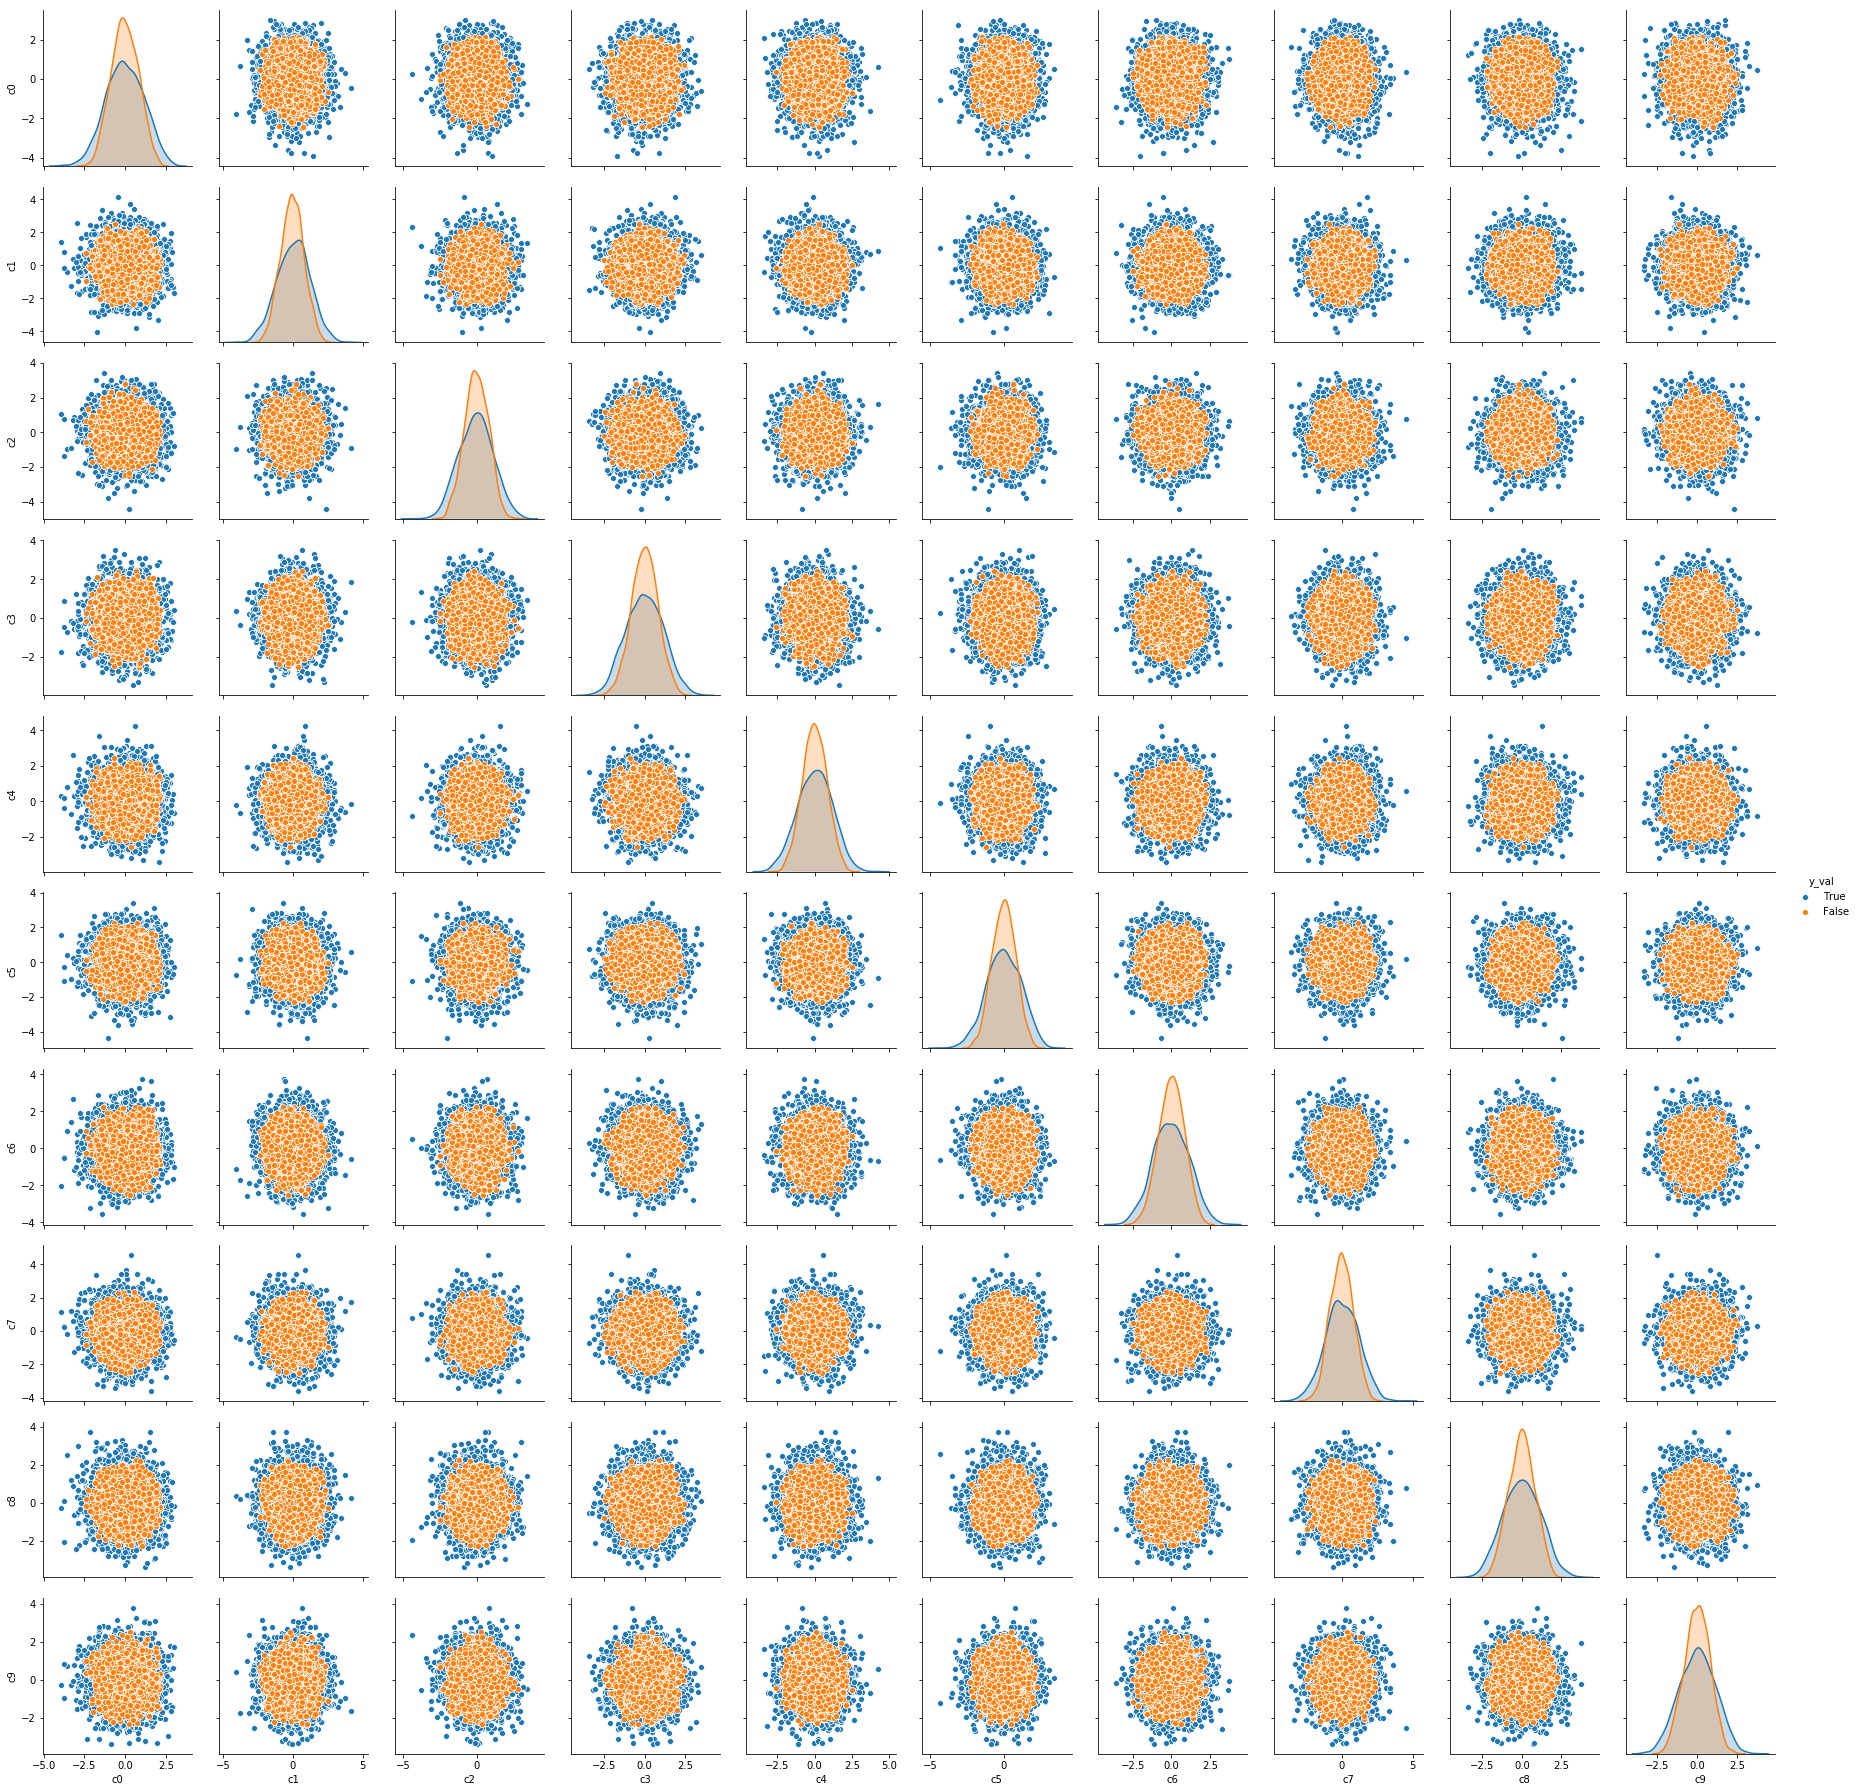

In [10]:
sns.pairplot(df, vars=columns, hue='y_val', hue_order=[True, False])

The Gradient boosting classifier is fitted using the training data set and it's accuracy is estimated using the test data set.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# fit estimator
est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
est.fit(X_train, y_train)

# predict class labels
pred = est.predict(X_test)

# score on test data (accuracy)
acc = est.score(X_test, y_test)
print('ACC: %.4f' % acc)

ACC: 0.9136


All the 10 features are approximately equally important

In [12]:
pd.DataFrame(est.feature_importances_, index=range(1, 11), columns=['features']).transpose()

,1,2,3,4,5,6,7,8,9,10
features,0.10,0.10,0.10,0.11,0.10,0.10,0.10,0.09,0.10,0.10


The table displays the precision and the recall

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

       -1.0       0.90      0.93      0.92       629
        1.0       0.93      0.90      0.91       621

avg / total       0.91      0.91      0.91      1250



The Gradient boosting model fits this synthetic data set with high accuracy.